# Project 2: Forecasting Starbucks Revenue

**Due: May 25, 2025**  
**Work in Pairs**
**Madi Hamm & Emanuel Myers**

## 1. IMPACT Model Planning (25 points) In a Word Document
- Define the risk (e.g., pressure to overstate revenue) and its audit relevance
- Choose and justify:
  - One internal variable
  - One macroeconomic variable you will scrape (e.g., CPI or interest rate)
  - One source of sentiment (e.g., Yahoo Finance headlines during earnings seasons)
- Describe your planned analysis (ARIMA, ARIMAX, regression, tone review)
- What patterns or red flags will you look for?
- How will you explain the results to an audit committee?
- Suggest 1–2 key metrics an auditor should continue monitoring
- Identify one limitation in your data or method

## 2. Visualize and Forecast Revenue Using ARIMA (25 points)
- Plot historical revenue from `starbucks_financials_expanded.csv`
- Describe trends (e.g., seasonality, volatility) and choose a forecast window (2–4 quarters)
- Build and evaluate an ARIMA model
- Report AIC/RMSE, and plot actual vs. forecasted revenue
- Reflect on what the forecast suggests about performance pressure

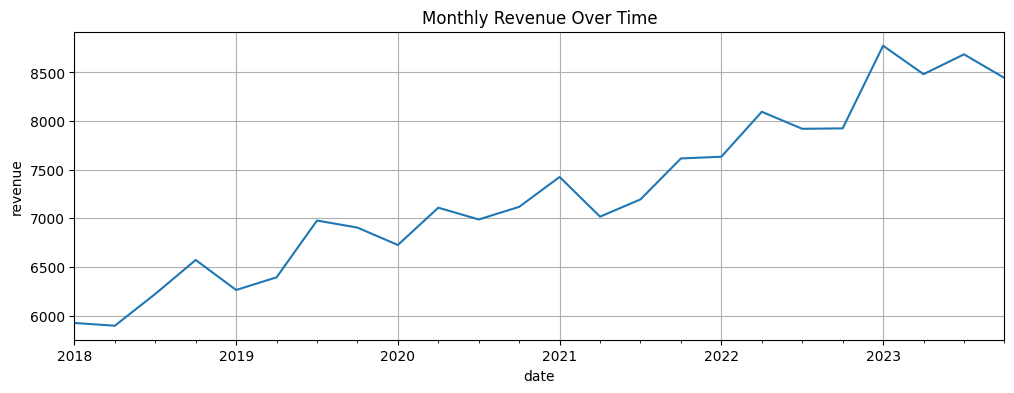

In [1]:
# Plot historical revenue
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("starbucks_financials_expanded.csv", parse_dates=["date"], index_col="date")
df["revenue"].plot(title="Monthly Revenue Over Time", figsize=(12, 4))
plt.ylabel("revenue")
plt.grid(True)
plt.show()

Describe trends and justify your forecast window (2–4 quarters)

The “Monthly Revenue Over Time” graph had a generally upward trend with a clear overall increase from 2018 to 2023. While there are some periodic fluctuations, there is no consistent seasonal pattern, indicating low seasonality. The revenue explained through the graph is moderately volatile, with noticeable year-to-year changes, though the fluctuations remain in a manageable range. 

We would pick a 4-quarter forecasting period because it would align the prediction with the fiscal year, as our data has presented in the past. This will help us continue to follow the stable trend and think ahead on planning and any management of uncertainties. 

In [2]:
# Build and evealuate ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["revenue"], order=(1, 1, 1))

results = model.fit()

results.summary()

c:\Users\egmjr\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\egmjr\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\egmjr\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                revenue   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -165.395
Date:                Sun, 25 May 2025   AIC                            336.789
Time:                        23:10:42   BIC                            340.196
Sample:                    03-31-2018   HQIC                           337.646
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1580      1.153     -0.137      0.891      -2.419       2.103
ma.L1         -0.0720      1.108     -0.065      0.948      -2.243       2.099
sigma2      1.017e+05   2.85e+04      3.570      0.000    4.59e+04    1.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.72   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.10   Prob(JB):                         0.58
Heteroskedasticity (H):               1.36   Skew:                             0.52
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Report AIC/RMSE and plot actual vs. forecasted revenue

The AIC of 336.789 tells you how well the ARIMA (1,1,1) model balances fit and complexity. However, evaluating its quality requires comparing it to other models. The actual revenue in the final observed period is approximately $8,500, while the forecast for early 2024 ranges from $7,900 to $9,100. The wide range in the confidence interval indicates a high degree of uncertainty in the predictions. The variance in the possible success of the company in future months could indicate pressure for management to sustain performance. 

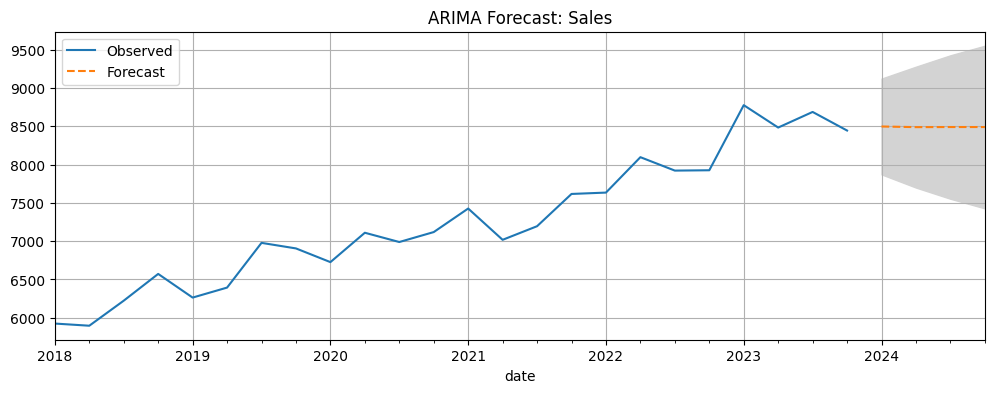

In [3]:
# plot actual vs forecasted revenue
forecast = results.get_forecast(steps=4)
ci = forecast.conf_int()

df["revenue"].plot(label="Observed", figsize=(12, 4))
forecast.predicted_mean.plot(label="Forecast", style='--')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color="lightgray")
plt.legend()
plt.title("ARIMA Forecast: Sales")
plt.grid(True)
plt.show()

Reflect on what the forecast reveals about performance pressure

The predicted model has a wide confidence interval, representing uncertainty in the forecast. Furthermore, the forecast widens overtime showing increased unpredictability. The possible variance in Starbucks’ future performance could be adding to the pressure to meet expectations, as it could be a large decline in growth. There could be internal pressure to continue the growth and momentum, even as the model suggests possible decline. Executives may add to the pressure, potentially setting unrealistic goals that, when not met, may trigger concern and scrutiny from the stockholders. 

## 3. Add a Scraped Macroeconomic Indicator to ARIMAX (25 points)
- Scrape one macroeconomic variable (e.g., CPI or interest rates)
- Add it to an ARIMAX model and compare performance to your ARIMA model
- Interpret the macro variable’s impact using theory and model output

In [4]:
import requests
import pandas as pd

api_key = "755f96b3bf3c15588f3de4dbd65ced72"
cpi_series_id = "CPALTT01USQ657N"

url = "https://api.stlouisfed.org/fred/series/observations"
params = {
    "series_id": cpi_series_id,
    "api_key": api_key,
    "file_type": "json",
    "observation_start": "2018-04-01"
}

response = requests.get(url, params=params)
data = response.json()["observations"]

df_cpi = pd.DataFrame(data)[["date", "value"]]
df_cpi.columns = ["date", "CPI"]
df_cpi["date"] = pd.to_datetime(df_cpi["date"])
df_cpi["CPI"] = df_cpi["CPI"].astype(float)

df_revenue = pd.read_csv("starbucks_financials_expanded.csv")
df_revenue["date"] = pd.to_datetime(df_revenue["date"]) + pd.Timedelta(days=1)

df_merged = pd.merge(df_cpi, df_revenue, on="date", how="inner")

print(df_merged.head())

        date       CPI  revenue  expenses  transactions  store_count  \
0 2018-04-01  1.033076  5924.18   4201.67          1011        34463   
1 2018-07-01  0.327268  5895.87   3859.70          1039        34248   
2 2018-10-01 -0.057495  6222.79   4422.88           863        31027   
3 2019-01-01  0.335116  6572.06   4383.91           944        31695   
4 2019-04-01  1.198513  6263.20   4111.82           897        30495   

   avg_ticket  marketing_spend  employee_count  loyalty_members  \
0        5.96           386.93          334766            24392   
1        5.78           348.37          373530            23528   
2        6.27           578.91          393557            20474   
3        5.44           542.44          361087            22757   
4        4.74           490.02          395839            22249   

   mobile_orders_pct  coffee_bean_price  temperature_index  
0               0.28               2.96              69.42  
1               0.36               2.03   

In [5]:
# ARIMAX model
exog = df_merged[["CPI"]]
arimax_model = ARIMA(df_merged["revenue"], order=(1, 1, 1), exog=exog)
arimax_results = arimax_model.fit()
arimax_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                revenue   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -165.253
Date:                Sun, 25 May 2025   AIC                            338.506
Time:                        23:10:50   BIC                            343.048
Sample:                             0   HQIC                           339.648
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CPI           44.2696    102.111      0.434      0.665    -155.864     244.404
ar.L1         -0.1872      1.280     -0.146      0.884      -2.697       2.323
ma.L1         -0.0314      1.290     -0.024      0.981      -2.559       2.496
sigma2      1.005e+05   2.76e+04      3.640      0.000    4.64e+04    1.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.62   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.11   Prob(JB):                         0.58
Heteroskedasticity (H):               1.37   Skew:                             0.53
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

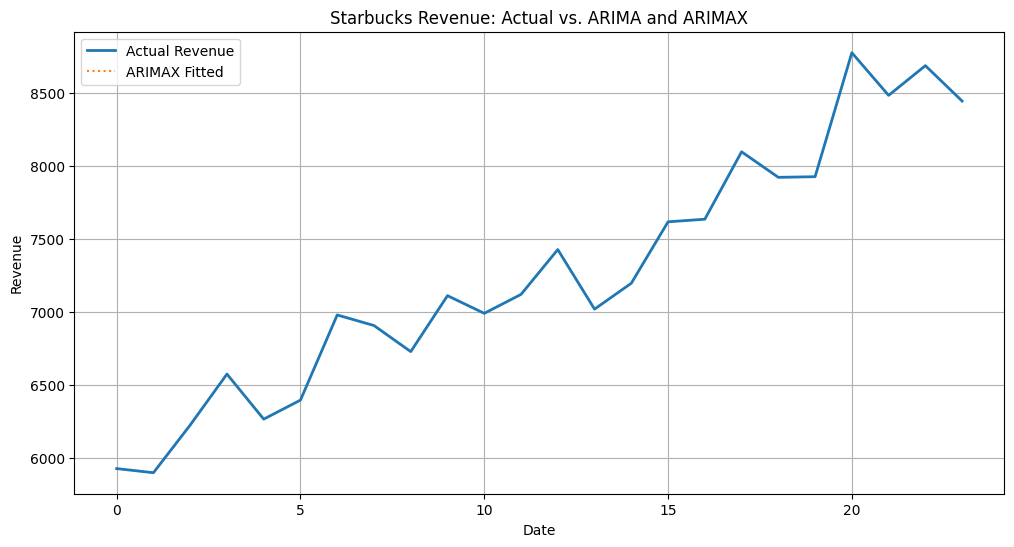

In [6]:
# graphing the ARIMAX model
import matplotlib.pyplot as plt

df_merged["ARIMAX_Fitted"] = results.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(df_merged["revenue"], label="Actual Revenue", linewidth=2)
plt.plot(df_merged["ARIMAX_Fitted"], label="ARIMAX Fitted", linestyle=":")
plt.title("Starbucks Revenue: Actual vs. ARIMA and ARIMAX")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()

Compare to ARIMA

When comparing the ARIMA and the ARIMAX model, the ARIMA model has a better fit, indicated by the lower AIC and BIC. The inclusion of the CPI as a macroeconomic variable does not significantly improve the model’s explanatory power. Both AR and MA terms are statistically insignificant in each model, suggesting that short-term dependencies in the revenue series are weak or overshadowed by other factors.

Interpret the macro variable’s impact using theory and model fit

CPI is not statistically significant, with a p value of 0.665, meaning that we cannot say it is a significant predictor of revenue in this model because changes in CPI are not strongly correlated with changes in revenue. There is a coefficient of 44.27 which means that for every one-unit increase in CPI, revenue increases by approximately $44.27. This suggests that, in this context, inflation does not meaningfully explain revenue changes. A possible explanation for this could be that Starbucks’ revenue is driven by internal factors or customer resilience, rather than broad inflationary trends. 

## 4. Build a Regression Model Step-by-Step (50 points)
### Step 1: One Internal Variable
- Choose and justify one internal variable
- Run a regression and interpret R², coefficient, and p-value

### Step 2: Add a Second Internal Variable
- Choose a second internal variable (justify with theory)
- Update the model and compare metrics (R², AIC)

### Step 3: Add Macroeconomic Variable
- Add the macroeconomic variable from ARIMAX
- Interpret its significance in context

### Step 4: Narrative Tone Analysis
- Scrape **1–2 headlines per earnings season (Jan, Apr, Jul, Oct)**
- Use VADER to score tone (compound score)
- Reflect on whether tone matches performance or raises red flags

One Internal Variable 

The first internal variable, store count can help us analyze and identify if there is any 	correlation between revenue and the number of locations Starbucks has.  Generally, 	if there is any variation with Starbucks’ store count, it will be reflected in various 	aspects in their financials. We can assume that if the number of locations goes down, 	the overall revenue, expenses, and transactions should similarly go down as well. 	The regression model returned a non-significant score, meaning that revenue and 	the number of stores is not correlated. Additionally, with a r-squared value of 0.983, 	this indicates that around 98% of the variation in revenue is explained by the store 	count. 

R^2: Shows that the models explains 98% of the variation in the dependent variable. 
Coefficient: The coefficient indicates that with every store increase, revenue also increases by 0.22. 

Second Internal Variable  

The second internal variable used is average ticket price. By comparing the average 	ticket price, we can get better insights in relation to our revenue since Starbucks’ 	revenue is based on the number of transactions and the average ticket price. 		Similarly to the first internal variable, generally if there is any variation with the 	average ticket price, we should see an increase or decrease that mirrors and reflects 	the price. The only variable to analyze in relation to average ticket price is the 	number of transactions that varied slightly, but overall continued to remain 		constant. Similarly to store count, the regression model returned a non-significant 	score, indicating that the variable and revenue are not correlated. 

R^2: With an R-squared of 0.078, it explains 7.8% of of the variation in the dependent variable. 
AIC: With a lower AIC compared to the first variable, we can see that the model is improving slightly with the increased number of variables. 

Macroeconomic Variable (from ARIMAX) 

The macroeconomic variable used is CPI used from ARIMAX which is used to assess 	inflation in consumer goods and services and helps understand the overall economic 	pressures and fluctuations. In the regression model, CPI was not statistically 			significant meaning that there was no correlation to Starbuck’s revenue and the 		economic pressures that occurred, potentially revealing that revenue is 		overstated. Like the other two variables, store count and average ticket price, the 	        regression model indicates that these variables and CPI are not statistically        	significant, explaining that there isn’t any correlation between these variables and 	revenue. Overall, it suggests that there may be other variables or factors that 		influence revenue. 

In [11]:
#Step 1: Choose and justify one internal variable.
import statsmodels.api as sm

df = pd.read_csv('starbucks_financials_expanded.csv')
df['date'] = pd.to_datetime(df['date'])

y = df['revenue']
X = df[['store_count']]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                revenue   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              1311.
Date:                Sun, 25 May 2025   Prob (F-statistic):                    8.70e-22
Time:                        23:17:14   Log-Likelihood:                         -198.86
No. Observations:                  24   AIC:                                      399.7
Df Residuals:                      23   BIC:                                      400.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
store_count     0.2212      0.006     36.212      0.000       0.209       0.234
==============================================================================
Omnibus:                        0.309   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.482
Skew:                           0.133   Prob(JB):                        0.786
Kurtosis:                       2.359   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#Step 2
XP2 = df[['store_count', 'avg_ticket']]
XP2 = sm.add_constant(XP2)

modelP2 = sm.OLS(y, XP2).fit()
modelP2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.8885
Date:                Sun, 25 May 2025   Prob (F-statistic):              0.426
Time:                        23:10:58   Log-Likelihood:                -194.52
No. Observations:                  24   AIC:                             395.0
Df Residuals:                      21   BIC:                             398.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.02e+04   3380.979      3.017      0.007    3168.735    1.72e+04
store_count    -0.0212      0.098     -0.215      0.832      -0.226       0.184
avg_ticket   -412.0667    329.420     -1.251      0.225   -1097.133     273.000
==============================================================================
Omnibus:                        1.492   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.132
Skew:                           0.297   Prob(JB):                        0.568
Kurtosis:                       2.117   Cond. No.                     6.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Step 3
df_cpi = df_cpi.rename(columns={"Date_Now": "date"})

df_cpi["date"] = pd.to_datetime(df_cpi["date"]).dt.to_period("Q").dt.to_timestamp()
df["date"] = pd.to_datetime(df["date"]).dt.to_period("Q").dt.to_timestamp()
df_cpi["date"] = pd.to_datetime(df_cpi["date"])
df["date"] = pd.to_datetime(df["date"])

df_merged = pd.merge(df, df_cpi[["date", "CPI"]], on="date", how="inner")

df_merged = df_merged.dropna(subset=["store_count", "avg_ticket", "CPI", "revenue"])

X3 = sm.add_constant(df_merged[["store_count", "avg_ticket", "CPI"]])
y = df_merged["revenue"]

model3 = sm.OLS(y, X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.7452
Date:                Sun, 25 May 2025   Prob (F-statistic):              0.538
Time:                        23:11:11   Log-Likelihood:                -185.19
No. Observations:                  23   AIC:                             378.4
Df Residuals:                      19   BIC:                             382.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9075.2529   3395.308      2.673      0.015    1968.793    1.62e+04
store_count    -0.0117      0.098     -0.119      0.907      -0.217       0.194
avg_ticket   -292.1985    328.752     -0.889      0.385    -980.284     395.887
CPI           228.7524    213.829      1.070      0.298    -218.797     676.302
==============================================================================
Omnibus:                        1.005   Durbin-Watson:                   0.327
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.910
Skew:                           0.280   Prob(JB):                        0.634
Kurtosis:                       2.203   Cond. No.                     6.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

starbucks_headlines = {
    "2022-Q1": [
        "Starbucks mixed Q1 results impacted by inflation and labor costs"
    ],
    "2022-Q2": [
        "Starbucks Q2 earnings and revenues miss estimates, stock down"
    ]
}

analyzer = SentimentIntensityAnalyzer()
tone_scores = []

for quarter, hl_list in starbucks_headlines.items():
    for headline in hl_list:
        score = analyzer.polarity_scores(headline)
        tone_scores.append({
             "quarter": quarter,
            "headline": headline,
            "compound": score["compound"],
            "positive": score["pos"],
            "neutral": score["neu"],
            "negative": score["neg"]
        })

tone_df = pd.DataFrame(tone_scores)
print(tone_df)


#The tone in the VADER analysis indicates a negative connotation, revealing a discrepancy between Starbucks performance in relation to revenue and the overall tone in the reports. 


   quarter                                           headline  compound  \
0  2022-Q1  Starbucks mixed Q1 results impacted by inflati...    0.0000   
1  2022-Q2  Starbucks Q2 earnings and revenues miss estima...   -0.1531   

   positive  neutral  negative  
0       0.0    1.000     0.000  
1       0.0    0.833     0.167  


## 5. Final Summary and Audit Reflection (25 points) In the same Word Document as before
Write a 1–2 paragraph summary answering the following:
- What was the most important variable and most insightful model?
- Was the narrative tone aligned with actual performance?
- Do you believe Starbucks' revenue may be overstated? Justify your answer.
- How did the IMPACT model help you organize your thinking?
- Include a final plot of actual vs. forecasted revenue.